测试集MSE: 0.0081, R²: 0.9831


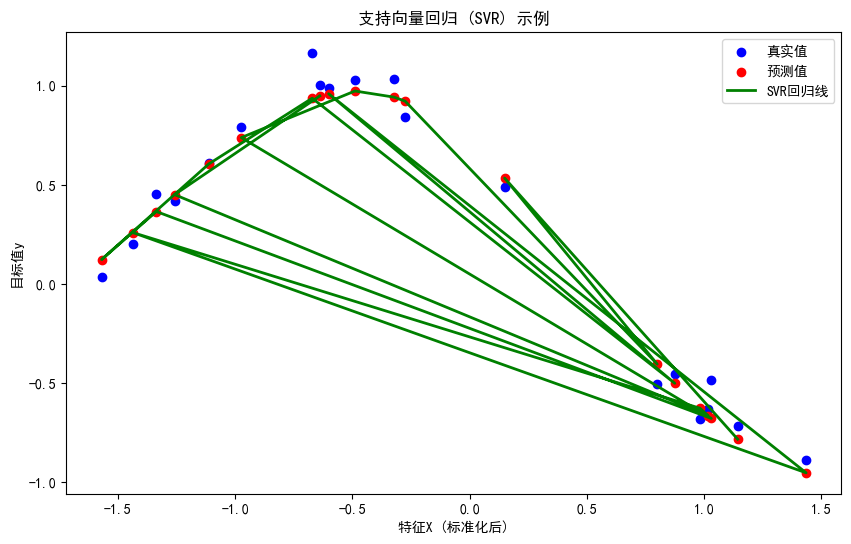

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong']  # 常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 1. 生成示例数据
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 特征 (100个样本，1维)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)  # 目标值 + 噪声

# 2. 数据标准化 (SVR对尺度敏感)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. 创建SVR模型
svr = SVR(kernel='rbf',  # 径向基函数核 (非线性)
          C=1.0,         # 正则化参数 (越大对训练数据拟合越强)
          epsilon=0.1,   # 容忍的误差范围
          gamma='scale') # 核函数系数 ('scale'自动调整)

# 5. 训练模型
svr.fit(X_train, y_train)

# 6. 预测
y_pred = svr.predict(X_test)

# 7. 评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"测试集MSE: {mse:.4f}, R²: {r2:.4f}")

# 8. 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='真实值')
plt.scatter(X_test, y_pred, color='red', label='预测值')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='SVR回归线')
plt.xlabel('特征X (标准化后)')
plt.ylabel('目标值y')
plt.title('支持向量回归 (SVR) 示例')
plt.legend()
plt.show()

['MLP', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'train_and_evaluate']
